## IMHOTEP: Compute and plot the difference of the ensemble mean of trend files from EGAI and ES (to obtain runoffs trends)


Notebook to illustrate how to:

1. Load a trend and plot it on a trend map
2. Load trends of an ensemble experiment and compute the ensemble mean T(<'EGAI'>) then T(<'ES'>) 
3. Compute T(<'EGAI'>) - T(<'ES'>) and plot it on a map


## Import modules

In [1]:
# standard libraries

import os,sys
import numpy as np

# xarray
import xarray as xr

# plot
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap

import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from matplotlib import cm 
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

import cartopy.feature as cfeature


# custom tools for plotting
sys.path.append('./')
from libimhotep import libSLXtoolsIMHOTEP as li


import cmocean

# for jupyter notebook display
%matplotlib inline

import pkg_resources


import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({'hatch.color': '#086A87'})

# list packages to be checked
root_packages = [
     'numpy', 
    'matplotlib', 'cartopy', 'cmocean']

# print versions, but check if package is imported first
for m in pkg_resources.working_set:
    if m.project_name.lower() in root_packages:
        print(f"{m.project_name}=={m.version}")

Name: libimhotep.libSLXtoolsIMHOTEP
Package: libimhotep
This is a collection of  tools i often use when analysing the IMHOTEP project data.
numpy==1.20.0
matplotlib==3.3.4
cmocean==2.0
Cartopy==0.18.0


### **1. Load a trend of a single member and plots**

In [2]:
# ES: this is experiment ES (ensemble simulation) 
prefixexp = "ES"

prefix = "eORCA025.L75-IMHOTEP"

# variable name of runoffs
varnarnf = 'sornf'

# variable name of SSS
varnasss = 'sosaline'


# years to read data from:
y1='1980'
y2='2018'

fo="1y" # output frequency

NE=10

# file type
fileType = "gridTsurf"

# path for data (experiments)
#diridat = li.Ffindinputdata(nexp,prefix=prefix,fo=fo)

# input directory on work for grid info
diri="/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/"

# plot directory
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Data/TREND_ncfiles/1y/"+prefixexp+"/"

# data output directory
dirdat="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Data/TREND_ncfiles/1y/"+prefixexp+"/"

# full file names
#sssfiles = li.Ffindinputdfiles(nexp,diridat,fo,prefix=prefix,fity="gridTsurf")

# ======== RUNOFFS
# file list
#rnffiles = li.Ffindinputdfiles(nexp,diridat,fo,prefix=prefix,fity="flxT")

#### Choose the member you want to plot

In [3]:
#=================================================== name of the file, specify the member of the ensemble (001, 002... to 010)
filo = "TR_"+prefixexp+".001_1980-2018.nc"

#### Open the netcdf file 

In [4]:
# open netcdf file (Dataset) cointaining the trend of data
DATdataset = xr.open_dataset(diro+filo,decode_times=True)

# convert Dataset to array
DATtr = DATdataset.to_array(dim='sosaline',name='Trend')


#### Quick initialisation of some plot parameters for maps and colors

In [5]:
# load some grid info you need to plot maps
dirigrid = '/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/'
lat = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lat']
lon = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lon']   
mask = xr.open_dataset(dirigrid+'mesh_hgr.nc')['tmask'][0,0,:,:]


# first define some  default color parameters and grid parameters 
pltcolparam = li.Fpltsetcolorsdefaults('TR')
pltcolparam['levbounds']=[-0.03,0.031,0.001]
pltcolparam['cbincr']=4
pltcolparam['cbformat']='%.3f'

pltgridparam = li.Fpltgridparamdefaults('GLO')

#### Plot on a trend map

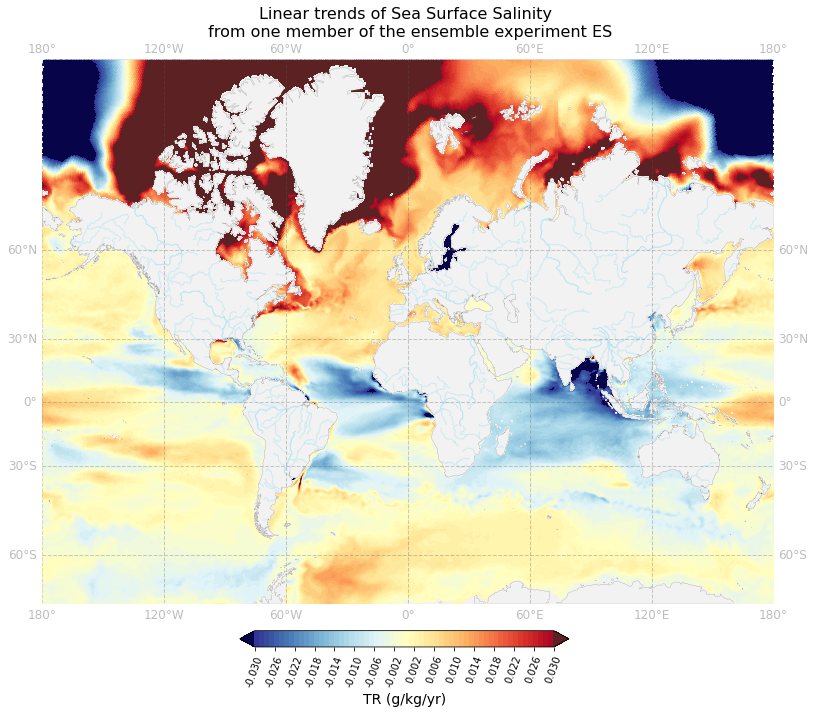

In [7]:
# open netcdf file (Dataset) cointaining the trend of data
DATdataset = xr.open_dataset(diro+filo,decode_times=True)

# convert Dataset to array
DATtr = DATdataset.to_array(dim='sosaline',name='Trend' )

# We want to plot the trend:
data2plot = DATtr

# mask data to plot for land missing values
data2plot  = data2plot.where(mask!=0).squeeze()  
m2plt      = mask.where(mask==0)
    
#========= CREATE FIGURE
fig3 = plt.figure(figsize=([18,10]),facecolor='white')

#========= CREATE COLORMAP
cmap,norm,levels = li.Fmycolormap(pltcolparam['levbounds'],cm_base=pltcolparam['cm_base'],cu=pltcolparam['cu'],co=pltcolparam['co']) ##080449

#========= DATA SYSTEM PROJECTION (USE PlateCarre if coordinates are in lon, lat)
trdata  = ccrs.PlateCarree() 

#========= DEAL WITH PROJECTION FOR GLOBAL MAPS
ax = plt.axes(projection= ccrs.Mercator(central_longitude=pltgridparam['loncentr'],min_latitude=pltgridparam['minlat'], max_latitude=pltgridparam['maxlat'], globe=None))

#========= THIS IS WHERE THE MODEL VARIABLE (SUCH AS SSS) IS ACTUALLY PLOTTED        
cs   = plt.pcolormesh(lon.squeeze(), lat.squeeze(), data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)


#========= GREY SHADING ON CONTINENTS
    
# add grey shading  where ocean mask is 0 (land gridpoints in the model)
# rgb color for model land grid points
r=pltcolparam['rgb'][0];g=pltcolparam['rgb'][1];b=pltcolparam['rgb'][2]
    
# color for continents from data based (hi-res)
onecohrml=pltcolparam['onecohrml']
alphaland=pltcolparam['alphaland']
    
# add on plot
csland  = plt.pcolormesh(lon.squeeze(), lat.squeeze(), m2plt, shading='flat',cmap=li.Fmake_SLXcolormap(reverse=False,whichco='oneco',r=r,g=g,b=b),transform=trdata)


#========= ADD GEOGRAPHICAL FEATURES
# make plot nice with rivers, continents, grids:
ax,gl = li.Fpltaddfeatures(ax,pltgridparam['incrgridlon'],pltgridparam['incrgridlat'],onecohrml=pltcolparam['onecohrml'],alphaland=pltcolparam['alphaland'],reg=pltgridparam['reg'],landedgeco=pltcolparam['landedgeco'])  ##585858#BDBDBD

#========= ADD COLORBAR

tlabel=('TR (g/kg/yr)')
cb = li.Faddcolorbar(fig3,cs,ax,pltcolparam['levbounds'],levincr=pltcolparam['cbincr'],tformat=pltcolparam['cbformat'],
                             tlabel=tlabel,facmul=1,orientation='horizontal',tc='k',
                            bbta=(-0.18,-0.25,0.9,0.2))  
#========= ADD TITLE
ax.xaxis.set_label_position('top')
ax.set_title('Linear trends of Sea Surface Salinity \n from one member of the ensemble experiment '+prefixexp,fontsize=16)

#========= FREMOVE FRAME 
li.Fnospines(ax)

plt.show()


### **2. Load trends of an ensemble experiment and compute the ensemble mean T(<'EGAI'>) then T(<'ES'>)** 

* Ensemble mean of the trends of EGAI members

In [12]:
# Choose the experiment that interests you
prefixexp = "EGAI"

# plot directory
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Data/TREND_ncfiles/1y/"+prefixexp+"/"

#We do a loop so each trend of the member of the experiement (from 1 to 10) can be: opened from a saved netcdf file, converted in array, concatenated with previously loaded members
for i in range(NE):
    # nexp is modified as function of the number of the experiment (1,2,..,10) 
    if (i+1==10):
        nexp = prefixexp+".0"+str(i+1) 
        filo="TR_"+nexp+"_1980-2018.nc"
        namo="TR2plt_"+nexp+"_1980-2018.nc"
    else:
        nexp = prefixexp+".00"+str(i+1)
        filo="TR_"+nexp+"_1980-2018.nc"
        namo="TR2plt_"+nexp+"_1980-2018.nc"
    #print(nexp)
    
    # open netcdf file (Dataset) cointaining the trend of data
    DATdataset = xr.open_dataset(diro+filo,decode_times=True)
    
    # convert Dataset to array
    DATtr = DATdataset.to_array(dim ='sosaline',name=None )
    
    
    # concat with previously loaded members
    if (i+1 == 1):
        alldat = DATtr
    else:
        alldat = xr.concat([alldat, DATtr], "e")

# compute the ensemble mean
TemEGAI = alldat.mean(dim='e')


#TemEGAI

* Ensemble mean of the trends of ES members

In [11]:
# Choose the experiment that interests you
prefixexp = "ES"

# plot directory
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Data/TREND_ncfiles/1y/"+prefixexp+"/"

#We do a loop so each trend of the member of the experiement (from 1 to 10) can be: opened from a saved netcdf file, converted in array, concatenated with previously loaded members
for i in range(NE):
    # nexp is modified as function of the number of the experiment (1,2,..,10) 
    if (i+1==10):
        nexp = prefixexp+".0"+str(i+1) 
        filo="TR_"+nexp+"_1980-2018.nc"
        namo="TR2plt_"+nexp+"_1980-2018.nc"
    else:
        nexp = prefixexp+".00"+str(i+1)
        filo="TR_"+nexp+"_1980-2018.nc"
        namo="TR2plt_"+nexp+"_1980-2018.nc"
    #print(nexp)
    
    # open netcdf file (Dataset) cointaining the trend of data
    DATdataset = xr.open_dataset(diro+filo,decode_times=True)
    
    # convert Dataset to array
    DATtr = DATdataset.to_array(dim ='sosaline',name=None )
    
    
    # concat with previously loaded members
    if (i+1 == 1):
        alldat = DATtr
    else:
        alldat = xr.concat([alldat, DATtr], "e")

# compute the ensemble mean
TemES = alldat.mean(dim='e')


#TemES

### **3. Compute T(<'EGAI'>) - T(<'ES'>) and plot it on a map**

In [13]:
# load some grid info you need to plot maps
dirigrid = '/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/'
lat = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lat']
lon = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lon']   
mask = xr.open_dataset(dirigrid+'mesh_hgr.nc')['tmask'][0,0,:,:]


# first define some  default color parameters and grid parameters 
pltcolparam = li.Fpltsetcolorsdefaults('TR')
pltcolparam['levbounds']=[-0.01,0.010,0.001]
pltcolparam['cbincr']=4
pltcolparam['cbformat']='%.3f'

pltgridparam = li.Fpltgridparamdefaults('GLO')


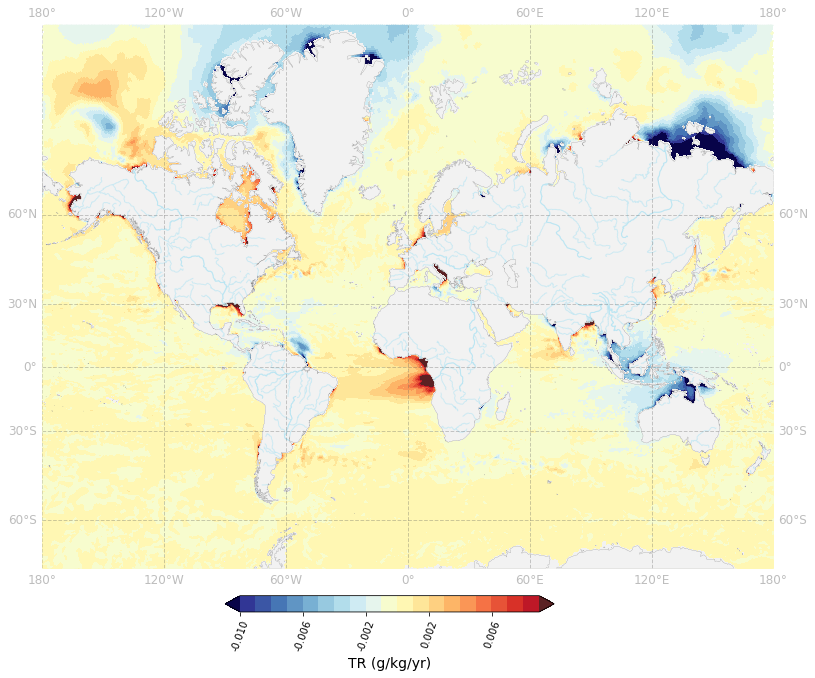

In [11]:
# name of the file
namo="diffTem2plt_EGAI_ES_1980-2018"

# plot directory
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Data/TREND_ncfiles/1y/diffTem_EGAI_ES/"

# compute the difference between the ensemble mean trends
data2plot = TemEGAI-TemES

# mask data to plot for land missing values
data2plot  = data2plot.where(mask!=0).squeeze()  
m2plt      = mask.where(mask==0)

#========= CREATE FIGURE
fig3 = plt.figure(figsize=([18,10]),facecolor='white')

#========= CREATE COLORMAP
cmap,norm,levels = li.Fmycolormap(pltcolparam['levbounds'],cm_base=pltcolparam['cm_base'],cu=pltcolparam['cu'],co=pltcolparam['co']) ##080449

#========= DATA SYSTEM PROJECTION (USE PlateCarre if coordinates are in lon, lat)
trdata  = ccrs.PlateCarree() 

#========= DEAL WITH PROJECTION FOR GLOBAL MAPS
ax = plt.axes(projection= ccrs.Mercator(central_longitude=pltgridparam['loncentr'],min_latitude=pltgridparam['minlat'], max_latitude=pltgridparam['maxlat'], globe=None))

#========= THIS IS WHERE THE MODEL VARIABLE (SUCH AS SSS) IS ACTUALLY PLOTTED        
cs   = plt.pcolormesh(lon.squeeze(), lat.squeeze(), data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)


#========= GREY SHADING ON CONTINENTS
# add grey shading  where ocean mask is 0 (land gridpoints in the model)
# rgb color for model land grid points
r=pltcolparam['rgb'][0];g=pltcolparam['rgb'][1];b=pltcolparam['rgb'][2]
# color for continents from data based (hi-res)
onecohrml=pltcolparam['onecohrml']
alphaland=pltcolparam['alphaland']
# add on plot
csland  = plt.pcolormesh(lon.squeeze(), lat.squeeze(), m2plt, shading='flat',cmap=li.Fmake_SLXcolormap(reverse=False,whichco='oneco',r=r,g=g,b=b),transform=trdata)


#========= ADD GEOGRAPHICAL FEATURES
# make plot nice with rivers, continents, grids:
ax,gl = li.Fpltaddfeatures(ax,pltgridparam['incrgridlon'],pltgridparam['incrgridlat'],onecohrml=pltcolparam['onecohrml'],alphaland=pltcolparam['alphaland'],reg=pltgridparam['reg'],landedgeco=pltcolparam['landedgeco'])  ##585858#BDBDBD

#========= ADD COLORBAR

tlabel=('TR (g/kg/yr)')
cb = li.Faddcolorbar(fig3,cs,ax,pltcolparam['levbounds'],levincr=pltcolparam['cbincr'],tformat=pltcolparam['cbformat'],
                         tlabel=tlabel,facmul=1,orientation='horizontal',tc='k',
                        bbta=(-0.20,-0.25,0.9,0.2))  
#========= ADD TITLE
ax.xaxis.set_label_position('top')
ax.set_title('Runoffs trends of Sea Surface Salinity \n from one member of the ensemble experiment '+nexp,fontsize=16)

#========= FREMOVE FRAME 
li.Fnospines(ax)

plt.show()

# Save fig in png, resolution dpi    
#li.Fsaveplt(fig3,diro,namo,dpifig=300)